## Method-1

1. Gender Polarity

Calculates the gender polarity based on the count of words associated with male and female gender in the text responses

In [11]:
import pandas as pd

male_tokens = ["he", "him", "his", "himself", "man", "men", "he's", "boy", "boys"]
female_tokens = ["she", "her", "hers", "herself", "woman", "women", "she's", "girl", "girls"]

def classify_gender(text):
    tokens = text.lower().split()
    male_count = sum(tokens.count(token) for token in male_tokens)
    female_count = sum(tokens.count(token) for token in female_tokens)
    if male_count > female_count:
        return "Male"
    elif female_count > male_count:
        return "Female"
    else:
        return "Neutral"

file_path = "output_data.xlsx"
df = pd.read_excel(file_path)

df['Classification'] = df['responses'].apply(classify_gender)
df.to_excel(file_path, index=False)
print("Classification results saved")

Classification results saved


2. Sentiment analysis

In the VADER model, sentiment scores are interpreted as follows:


*   A sentiment score close to 1 indicates positive sentiment.
*   A sentiment score close to -1 indicates negative sentiment.
*   A sentiment score near 0 indicates neutral sentiment.








In [2]:
pip install vaderSentiment


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def classify_gender(text):
    tokens = text.lower().split()
    male_count = sum(tokens.count(token) for token in male_tokens)
    female_count = sum(tokens.count(token) for token in female_tokens)
    if male_count > female_count:
        return "Male"
    elif female_count > male_count:
        return "Female"
    else:
        return "Neutral"

def perform_sentiment_analysis(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = analyzer.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.5:
        return "Positive"
    elif compound_score <= -0.5:
        return "Negative"
    else:
        return "Neutral"

file_path = "output_data.xlsx"
df = pd.read_excel(file_path)

df['Gender Classification'] = df['responses'].apply(classify_gender)
df['Sentiment'] = df['responses'].apply(perform_sentiment_analysis)
df.to_excel(file_path, index=False)

print("Gender classification and sentiment analysis results are saved")


Gender classification and sentiment analysis results have been saved to the Excel file.


In [9]:
pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 83.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 27.8 MB/s eta 0:00:00


In [10]:
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

model_name = "distilbert-base-uncased"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

file_path = "output_data.xlsx"
df = pd.read_excel(file_path)

sentiment_labels = ["Negative", "Neutral", "Positive"]
def perform_sentiment_analysis(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    predicted_class = torch.argmax(outputs.logits, dim=1).item()
    return sentiment_labels[predicted_class]

df['Sentiment'] = df['responses'].apply(perform_sentiment_analysis)
print(df)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'classifier.weight', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


   Unnamed: 0              prod_type  \
0           0  Hair styling products   
1           1  Hair styling products   
2           2               Deodrant   
3           3               Deodrant   
4           4             Foundation   
5           5                Shampoo   
6           6                Shampoo   
7           7                Perfume   
8           8            Moisturizer   
9           9            Moisturizer   

                                           prod_name  \
0  Mud-Mask: Hair & Scalp Detoxifying Pre-Wash Cl...   
1                              In-shower style fixer   
2        Dove Advanced Care Antiperspirant Deodorant   
3         Old Spice Orignal High Endurance Deodorant   
4                 Fit Me Matte & Poreless Foundation   
5  Naturals Silky Straight Shampoo & Conditioner ...   
6  Head & Shoulders Men Full & Thick 2-in-1 Anti-...   
7                              Florist Eau de Parfum   
8                          Daily Moisturizing Lotion   

3. General interpretations

In [ ]:
pip install pandas matplotlib scipy


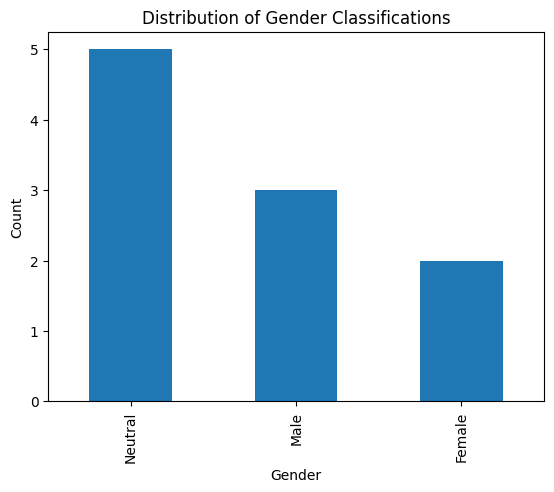

Chi-squared test results: Chi2 = 20.0, p = 0.3328196787507191
The distribution of gender classifications is not significant.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

file_path = "output_data.xlsx"
df = pd.read_excel(file_path)
responses = df["responses"]
gender_classification = df["Gender Classification"]

# chi-squared test
contingency_table = pd.crosstab(responses, gender_classification)

# check for statistical significance
chi2, p, _, _ = chi2_contingency(contingency_table)
if p < 0.05:
    significance = "significant"
else:
    significance = "not significant"

gender_counts = df["Gender Classification"].value_counts()
gender_counts.plot(kind="bar")
plt.title("Distribution of Gender Classifications")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

print(f"Chi-squared test results: Chi2 = {chi2}, p = {p}")
print(f"The distribution of gender classifications is {significance}.")


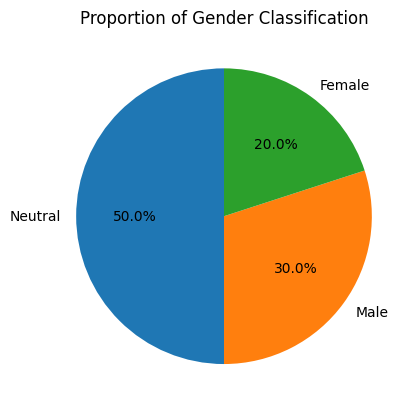

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "output_data.xlsx"
df = pd.read_excel(file_path)

gender_proportion = df['Gender Classification'].value_counts() / len(df)
gender_labels = gender_proportion.index

plt.pie(gender_proportion, labels=gender_labels, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Gender Classification')
plt.show()


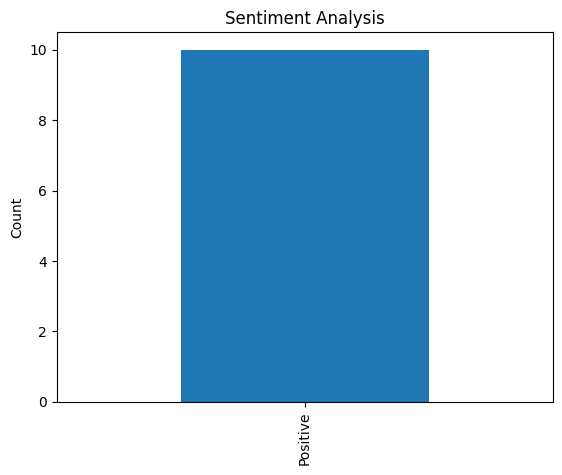

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "output_data.xlsx"
df = pd.read_excel(file_path)
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Analysis')
plt.ylabel('Count')
plt.show()
